In [4]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

aux=np.load('test_data.npz')
softmax = aux['softmax']
preds = aux['predicted_classes']
inputs = aux['X_test']
targets = aux['y_test']
dense_1 = aux['dense_1']
dense_2 = aux['dense_2']

print('inputs ', inputs.shape)
print('softmax', softmax.shape)
print('targets', targets.shape)
print('preds  ', preds.shape)
print('dense_1', dense_1.shape)
print('dense_2', dense_2.shape)

inputs  (10000, 28, 28)
softmax (10000, 10)
targets (10000,)
preds   (10000,)
dense_1 (10000, 512)
dense_2 (10000, 512)


In [6]:
# chosen method:
scaled = StandardScaler().fit_transform(inputs.reshape(-1,28*28))
embeddings = TSNE(n_components=2).fit_transform(scaled, targets)

In [7]:
np.save('test_embeddings',embeddings)

In [8]:
def plot_embeds(embeddings, labels, correct, title=''):
    for i in range(10):
        idxs = (labels==i) * correct
        plt.plot(embeddings[:,0][idxs], embeddings[:,1][idxs], '.', alpha=0.1)
    for i in range(10):
        idxs = (labels==i) * np.logical_not(correct)
        plt.plot(embeddings[:,0][idxs], embeddings[:,1][idxs], '.')
    plt.legend([str(c) for c in range(10)])
    plt.title(title)
    plt.show()

Clustering based on softmax output; colors based on true class

In [9]:
scaled = StandardScaler().fit_transform(softmax)
embeddings = TSNE(n_components=2, early_exaggeration=12.0).fit_transform(scaled)

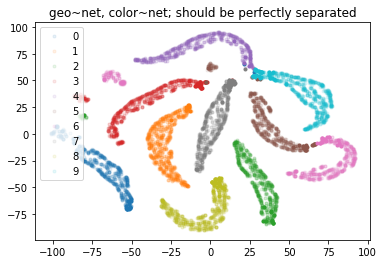

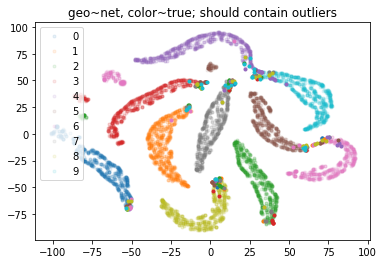

In [10]:
plot_embeds(embeddings, preds, targets==preds, title='geo~net, color~net; should be perfectly separated')
plot_embeds(embeddings, targets, targets==preds, title='geo~net, color~true; should contain outliers')

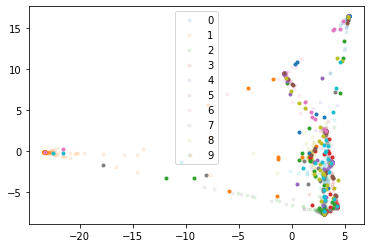

In [11]:
scaled = StandardScaler().fit_transform(softmax)
embeddings = LinearDiscriminantAnalysis(n_components=2).fit_transform(scaled, targets)
plot_embeds(embeddings, targets, targets==preds)

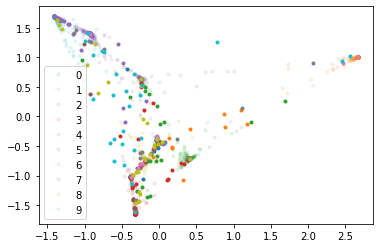

In [12]:
scaled = StandardScaler().fit_transform(softmax)
embeddings = PCA(n_components=2,svd_solver='auto').fit_transform(scaled)
plot_embeds(embeddings, targets, targets==preds)

Clustering based on whole image data; colors based on prediction

In [13]:
scaled = StandardScaler().fit_transform(inputs.reshape(-1,28*28))
embeddings = TSNE(n_components=2).fit_transform(scaled, targets)

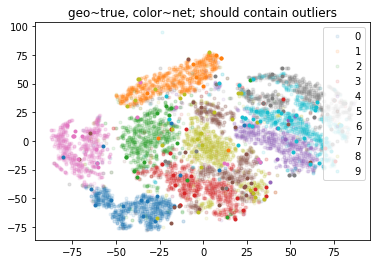

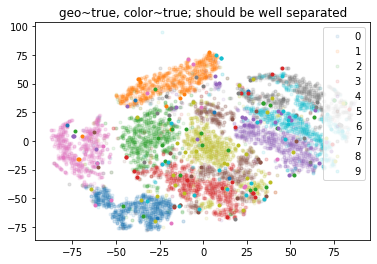

In [14]:
plot_embeds(embeddings, preds, targets==preds, title='geo~true, color~net; should contain outliers')
plot_embeds(embeddings, targets, targets==preds, title='geo~true, color~true; should be well separated')

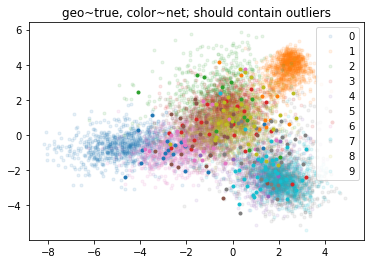

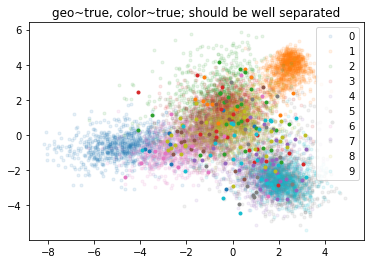

In [15]:
scaled = StandardScaler().fit_transform(inputs.reshape(-1,28*28))
embeddings = LinearDiscriminantAnalysis(n_components=2).fit_transform(scaled, targets)
plot_embeds(embeddings, preds, targets==preds, title='geo~true, color~net; should contain outliers')
plot_embeds(embeddings, targets, targets==preds, title='geo~true, color~true; should be well separated')

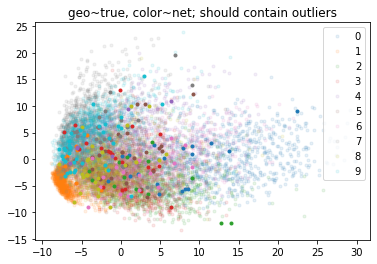

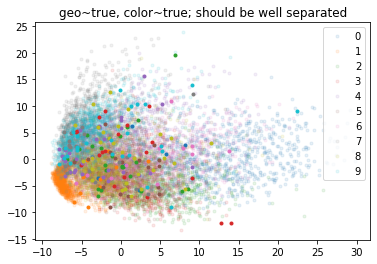

In [16]:
scaled = StandardScaler().fit_transform(inputs.reshape(-1,28*28))
embeddings = PCA(n_components=2,svd_solver='auto').fit_transform(scaled)
plot_embeds(embeddings, preds, targets==preds, title='geo~true, color~net; should contain outliers')
plot_embeds(embeddings, targets, targets==preds, title='geo~true, color~true; should be well separated')